In [1]:
import pandas as pd
import numpy as np

In [3]:
columns_to_read = ['review_text_lemm', 'review_id', 'autocredits', 'businesscredits', 'businessdeposits',
                   'corporate', 'creditcards', 'credits', 'debitcards', 'deposits', 'hypothec',
                   'leasing', 'remote', 'restructing' ]

In [4]:
data = pd.read_csv('process_data/alfa_lemmatize.csv',usecols=columns_to_read)

In [5]:
data.head()

,review_id,autocredits,businesscredits,businessdeposits,corporate,creditcards,credits,debitcards,deposits,hypothec,leasing,remote,restructing,review_text_lemm
0,10061124,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,я ежедневно на протяжение месяц звонить агенст...
1,10061095,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,по мой вопрос так никто и не откликаться. альф...
2,10061076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"здравствовать! я не являться клиент этот банк,..."
3,10061039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"уважаемый я банк, добрый вечер) хотеть уведомл..."
4,10061006,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"возникать проблема с то, что пристав заблокиро..."


In [11]:
data.columns

Index([u'review_id', u'autocredits', u'businesscredits', u'businessdeposits',
       u'corporate', u'creditcards', u'credits', u'debitcards', u'deposits',
       u'hypothec', u'leasing', u'remote', u'restructing',
       u'review_text_lemm'],
      dtype='object')

In [14]:
data.shape

(20552, 14)

In [20]:
pd.notnull(data['autocredits']).sum()

10122

In [6]:
unlabel_data = data[pd.isnull(data['autocredits'])]

In [7]:
train_data = data[pd.notnull(data['autocredits'])]

In [8]:
y_train = train_data.ix[:,'autocredits':'restructing']

In [9]:
for col in y_train.columns:
    y_train[col] = y_train[col].astype('int')

In [10]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [11]:
plt.rcParams['figure.figsize'] = (18.0, 10.0)

In [10]:
y_train.sum()

autocredits           98
businesscredits       39
businessdeposits      28
corporate           1354
creditcards         3193
credits             3195
debitcards          1596
deposits             617
hypothec              79
leasing                6
remote              1433
restructing          393
dtype: int64

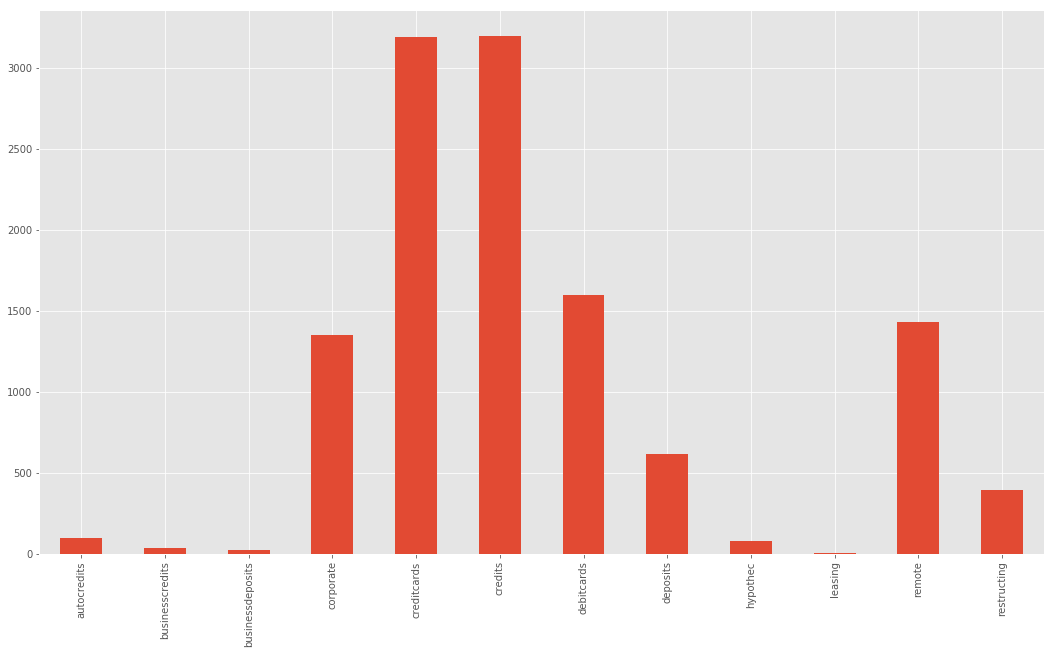

In [54]:
y_train.sum().plot(kind='bar');

In [55]:
y_train.sum(axis=1).value_counts()

1     8583
2     1287
3      199
4       31
5       12
12       5
6        3
7        1
8        1
dtype: int64

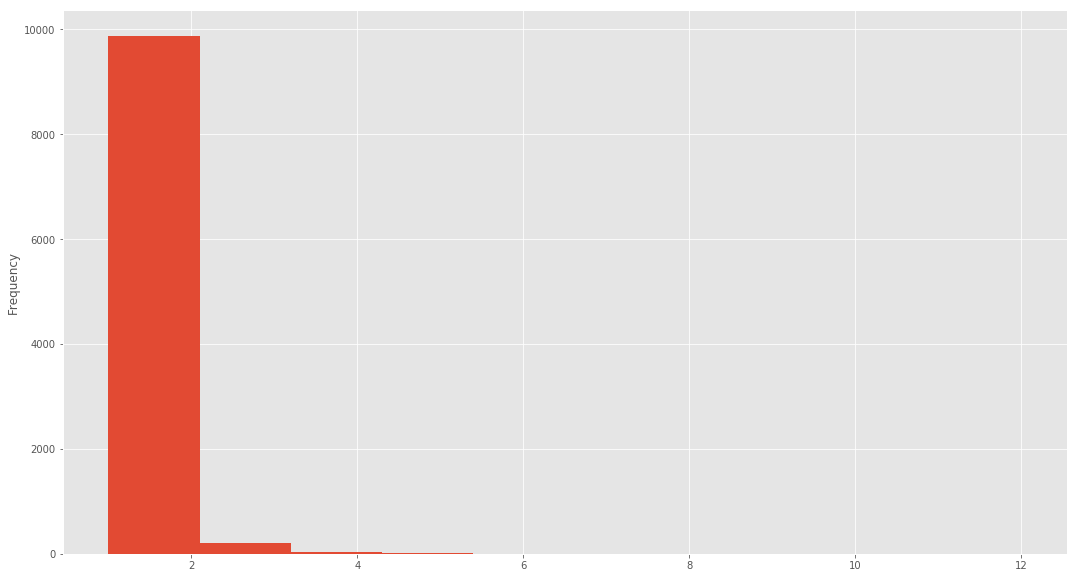

In [56]:
y_train.sum(axis=1).plot(kind='hist');

In [12]:
x_train = train_data['review_text_lemm']

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
from stop_words import get_stop_words

In [15]:
stop_words = get_stop_words('russian')

In [16]:
def tfidf_preproc(text):
    return filter(lambda x: not x.isdigit(), text)

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor=tfidf_preproc)

In [63]:
tfidf = tfidf_vectorizer.fit_transform(x_train)

In [64]:
tfidf

<10122x27332 sparse matrix of type '<type 'numpy.float64'>'
	with 940292 stored elements in Compressed Sparse Row format>

In [68]:
(940292./(10122*27332))*100

0.33987951990834026

In [16]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor=tfidf_preproc, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(x_train)

In [17]:
tfidf

<10122x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 670850 stored elements in Compressed Sparse Row format>

In [83]:
y_train.as_matrix()

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

In [96]:
parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
score = 'f1_weighted'

clf = GridSearchCV(MLkNN(), parameters, scoring=score, n_jobs=-1)
clf.fit(tfidf, y_train.as_matrix())

print clf.best_params_, clf.best_score_

{'k': 1, 's': 0.5} 0.526076198469


In [105]:
parameters = {'k': range(3,10), 's': [0.5, 0.7, 1.0]}
score = 'f1_weighted'

clf = GridSearchCV(MLkNN(), parameters, scoring=score, n_jobs=-1)
clf.fit(tfidf, y_train.as_matrix())

print clf.best_params_, clf.best_score_

{'k': 9, 's': 0.5} 0.580153365151


In [18]:
from scikitplot import classifier_factory

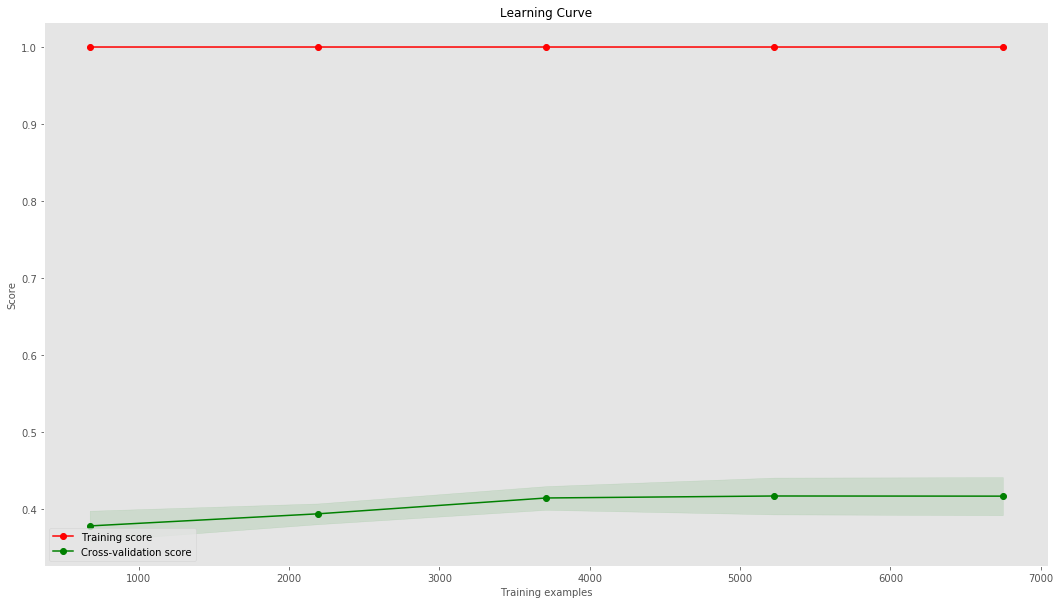

In [100]:
#mlknn_clf = classifier_factory(MLkNN(k=1, s=0.5))
classifier_factory(MLkNN(k=1, s=0.5)).plot_learning_curve(tfidf, y_train.as_matrix())
plt.show()

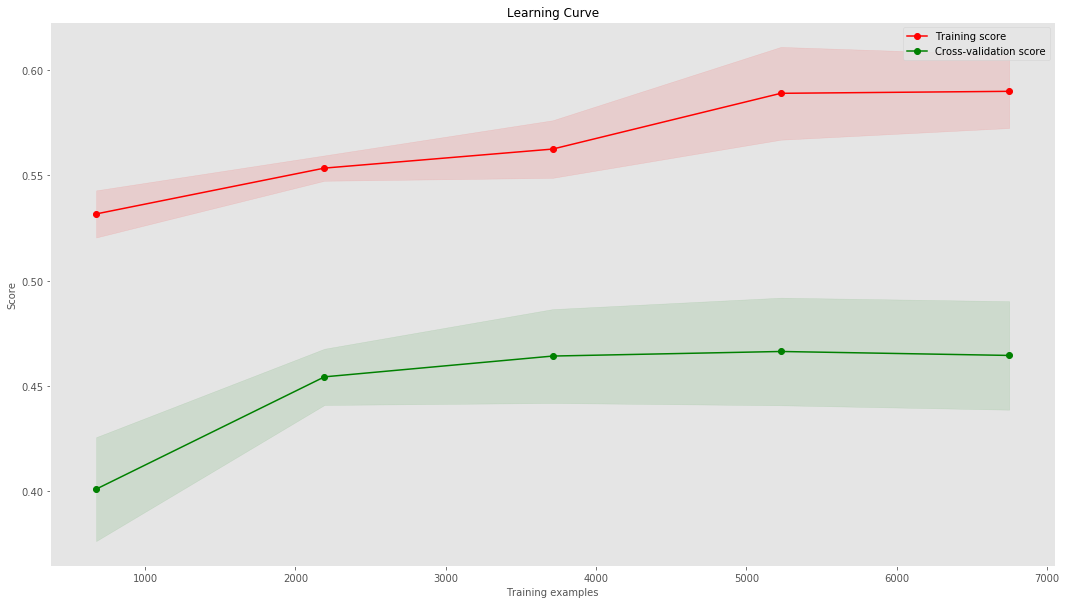

In [106]:
classifier_factory(MLkNN(k=9, s=0.5)).plot_learning_curve(tfidf, y_train.as_matrix(), n_jobs=-1)
plt.show()

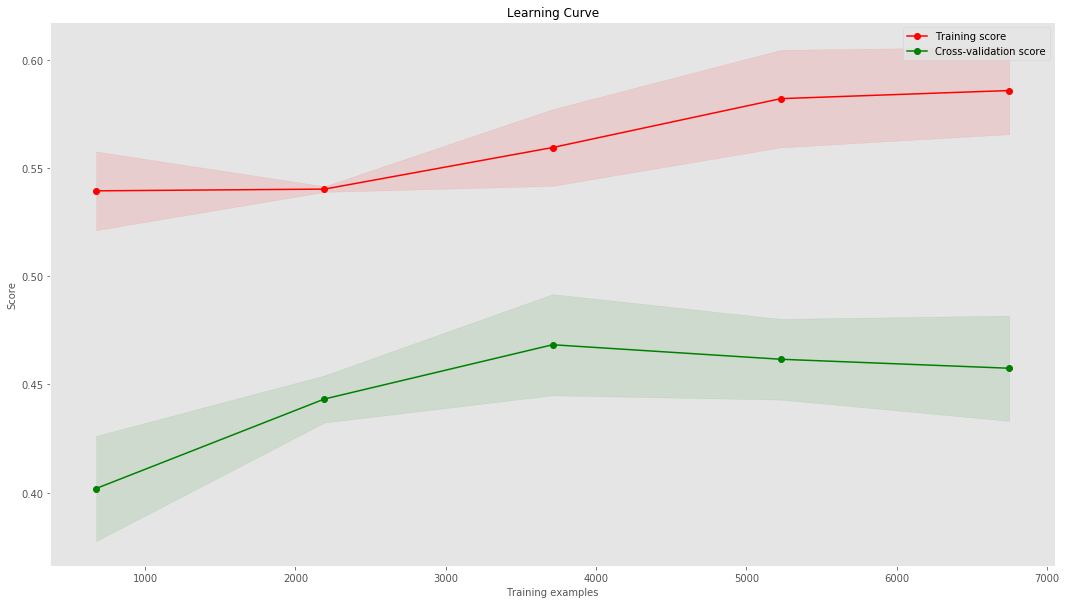

In [103]:
classifier_factory(MLkNN(k=10, s=0.8)).plot_learning_curve(tfidf, y_train.as_matrix(), n_jobs=-1)
plt.show()

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor=tfidf_preproc, max_features=10000)
tfidf_10000 = tfidf_vectorizer.fit_transform(x_train)

In [20]:
parameters = {'k': range(1,10), 's': [0.5, 0.7, 1.0]}
score = 'f1_weighted'

clf = GridSearchCV(MLkNN(), parameters, scoring=score, n_jobs=-1)
clf.fit(tfidf_10000, y_train.as_matrix())

print clf.best_params_, clf.best_score_

/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/py

{'k': 7, 's': 0.5} 0.590948104648


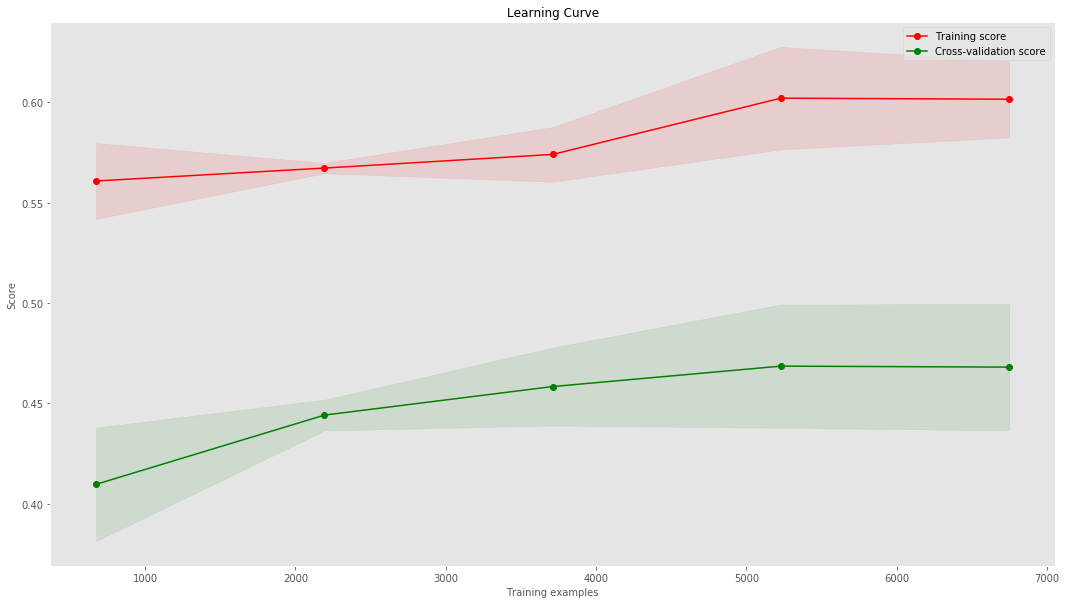

In [23]:
classifier_factory(MLkNN(k=7, s=0.5)).plot_learning_curve(tfidf_10000, y_train.as_matrix(), n_jobs=-1)
plt.show()

In [20]:
mlknn = MLkNN(k=7, s=0.5)
mlknn.fit(tfidf_10000, y_train.as_matrix())

MLkNN(ignore_first_neighbours=0, k=7, s=0.5)

In [31]:
pred_train = mlknn.predict(tfidf_10000)

In [33]:
pred_train

<10122x12 sparse matrix of type '<type 'numpy.int64'>'
	with 9717 stored elements in LInked List format>

In [32]:
pred_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
y_train.sum().sum()

12031

In [24]:
from skmultilearn.problem_transform import BinaryRelevance

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
parameters = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [10, 20, 30],
    'classifier__max_features': [100, 150, 200],
}
score = 'f1_weighted'

clf = GridSearchCV(BinaryRelevance(), parameters, scoring=score, n_jobs=-1)
clf.fit(tfidf_10000, y_train.as_matrix())

print clf.best_params_, clf.best_score_

/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/an

{'classifier__max_features': 200, 'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=200, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), 'classifier__n_estimators': 30} 0.525183020985


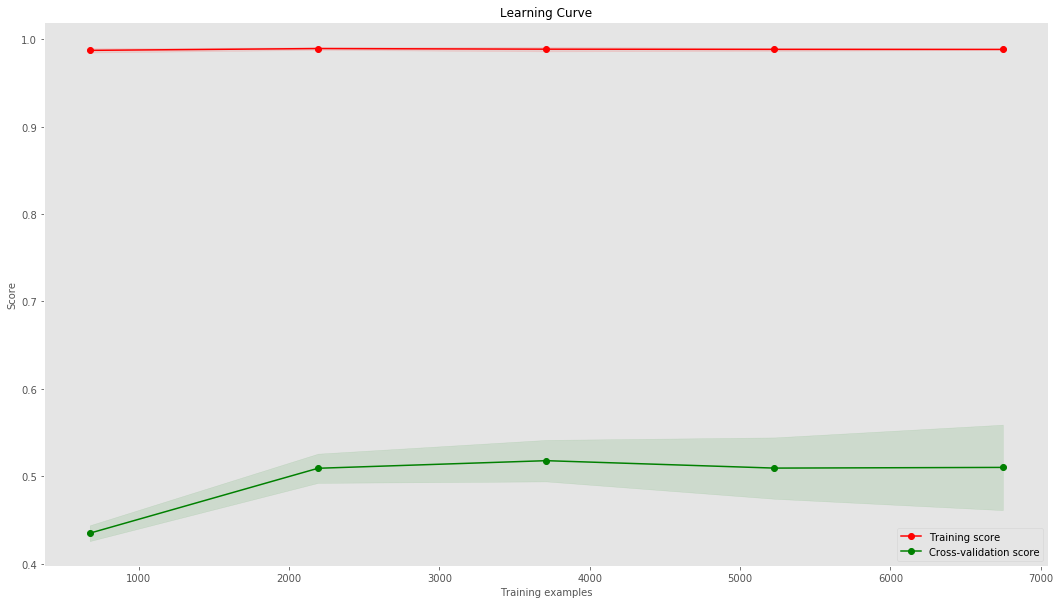

In [27]:
classifier_factory(BinaryRelevance(RandomForestClassifier(max_features=200, n_estimators=30))).plot_learning_curve(tfidf, y_train.as_matrix(), n_jobs=-1)
plt.show()

In [28]:
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.ensemble.rakeld import RakelD

In [29]:
parameters = {
    'labelset_size': range(2, 5),
    'classifier': [LabelPowerset(), BinaryRelevance()],
    'classifier__classifier': [RandomForestClassifier()]
}
score = 'f1_weighted'

clf = GridSearchCV(RakelD(), parameters, scoring=score, n_jobs=-1)
clf.fit(tfidf_10000, y_train.as_matrix())

print clf.best_params_, clf.best_score_

/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/morozovgleb/an

{'labelset_size': 4, 'classifier__classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), 'classifier': LabelPowerset(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       require_dense=[True, True])} 0.493707619161


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.multiclass import OneVsRestClassifier

In [23]:
parameters = {
    'estimator__class_weight': [None, 'balanced'],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': range(1,11)
}
mult_clf = OneVsRestClassifier(LogisticRegression(tol=0.001))
score = 'f1_weighted'

clf = GridSearchCV(mult_clf, parameters, scoring=score, n_jobs=-1, verbose=0)
clf.fit(tfidf_10000, y_train.as_matrix())

print clf.best_params_, clf.best_score_

/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/an

{'estimator__class_weight': 'balanced', 'estimator__penalty': 'l2', 'estimator__C': 1} 0.700323852792


In [39]:
data = pd.read_csv('process_data/alfa_lemmatize.csv')
for bank_name in ['avangard', 'binbank', 'fk_otkritie', 'raiffeisen', 'sberbank', 'tcs']:
    bank_data = pd.read_csv('process_data/{}_lemmatize.csv'.format(bank_name))
    data = data.append(bank_data, ignore_index=True)

In [35]:
for bank_name in ['alfa', 'avangard', 'binbank', 'fk_otkritie', 'raiffeisen', 'sberbank', 'tcs']:
    bank_data = pd.read_csv('process_data/{}_lemmatize.csv'.format(bank_name))
    print bank_name + '----' + str(bank_data.shape[0]) + '----' + str(bank_data.shape[1])

alfa----20552----28
avangard----4862----28
binbank----7389----28
fk_otkritie----6100----28
raiffeisen----5538----27
sberbank----50068----28
tcs----14658----28


In [40]:
data.shape

(109167, 28)

In [49]:
data.loc[data.bank_name=='raiffeisen','leasing']=0

In [53]:
unlabel_data = data[pd.isnull(data['autocredits'])]

In [54]:
train_data = data[pd.notnull(data['autocredits'])]

In [60]:
y_train = train_data[['autocredits', 'businesscredits', 'businessdeposits',
                   'corporate', 'creditcards', 'credits', 'debitcards', 'deposits', 'hypothec',
                   'leasing', 'remote', 'restructing']]

In [57]:
x_train = train_data['review_text_lemm']

In [61]:
y_train.columns

Index([u'autocredits', u'businesscredits', u'businessdeposits', u'corporate',
       u'creditcards', u'credits', u'debitcards', u'deposits', u'hypothec',
       u'leasing', u'remote', u'restructing'],
      dtype='object')

In [64]:
y_train = y_train.astype('int')

In [66]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor=tfidf_preproc, max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(x_train)

In [68]:
from sklearn.externals import joblib

In [139]:
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer_all_data_10000.pkl')

['models/tfidf_vectorizer_all_data_10000.pkl']

In [71]:
parameters = {
    'estimator__class_weight': [None, 'balanced'],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': range(1,11)
}
mult_clf = OneVsRestClassifier(LogisticRegression(tol=0.001))
score = 'f1_weighted'

clf = GridSearchCV(mult_clf, parameters, scoring=score, n_jobs=-1, verbose=0)
clf.fit(X_tfidf, y_train.as_matrix())

print clf.best_params_, clf.best_score_

/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/morozovgleb/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/m

{'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1', 'estimator__C': 1} 0.679035633622


In [72]:
best_clf = OneVsRestClassifier(LogisticRegression(tol=0.001, class_weight='balanced', penalty='l1', C=1.0))

In [73]:
best_clf.fit(X_tfidf, y_train.as_matrix())

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.001, verbose=0, warm_start=False),
          n_jobs=1)

In [74]:
joblib.dump(best_clf, 'models/logreg_10000_07.pkl')

['models/logreg_10000_07.pkl']

In [84]:
best_clf.predict(X_tfidf[0].toarray())

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [85]:
from pymystem3 import Mystem

In [86]:
stem = Mystem()

In [126]:
def predict_from_text(text, classifier, cat_names):
    text = pd.Series({'review': ''.join(stem.lemmatize(text))})
    text = tfidf_vectorizeru.transform(text)
    predict_cat = list(classifier.predict(text)[0])
    answer = [cat_names[i] for i in range(len(predict_cat)) if predict_cat[i]==1]
    return answer

In [143]:
data.shape

(109167, 28)

In [170]:
data.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'autocredits', u'bank_answer_check',
       u'bank_answer_datetime', u'bank_answer_text', u'bank_answer_text_lemm',
       u'bank_name', u'businesscredits', u'businessdeposits', u'corporate',
       u'creditcards', u'credits', u'debitcards', u'deposits', u'hypothec',
       u'leasing', u'remote', u'restructing', u'review_author_id',
       u'review_author_name', u'review_datetime', u'review_header',
       u'review_header_lemm', u'review_id', u'review_rating', u'review_text',
       u'review_text_lemm', u'category_check'],
      dtype='object')

In [157]:
unlabel_data.index

Int64Index([     2,      6,     12,     14,     23,     34,     40,     41,
                45,     47,
            ...
            109130, 109133, 109134, 109136, 109137, 109140, 109142, 109151,
            109155, 109156],
           dtype='int64', length=47211)

In [163]:
data['category_check'] = 0

In [ ]:
data.loc[:, 'category_check'][pd.notnull(data['autocredits'])] = 1

In [197]:
data_plot = data.drop(data.columns[[0,1,5,6,19,20,22,23,24,26,27]], axis=1)

In [196]:
data.columns[[0,1,5,6,19,20,22,23,24,26,27]]

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'bank_answer_text',
       u'bank_answer_text_lemm', u'review_author_id', u'review_author_name',
       u'review_header', u'review_header_lemm', u'review_id', u'review_text',
       u'review_text_lemm'],
      dtype='object')

In [180]:
unlabel_reviews = unlabel_data['review_text_lemm']

In [181]:
unlabel_reviews = tfidf_vectorizer.transform(unlabel_reviews)

In [183]:
unlabel_pred_cat = best_clf.predict(unlabel_reviews.toarray())

In [185]:
cat_columns = ['autocredits', 'businesscredits', 'businessdeposits',
                   'corporate', 'creditcards', 'credits', 'debitcards', 'deposits', 'hypothec',
                   'leasing', 'remote', 'restructing']

In [198]:
data_plot.loc[unlabel_data.index,cat_columns] = pd.DataFrame(unlabel_pred_cat, columns=cat_columns, index=unlabel_data.index)

In [203]:
data_plot['bank_answer_check'] = data_plot['bank_answer_check'].astype('int')

In [207]:
data_plot[cat_columns] = data_plot[cat_columns].astype('int')

In [210]:
data_plot.to_csv('process_data/data_plot.csv', index=False)